In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [2]:
d=pd.read_csv('heart_disease.csv')

In [3]:
df=pd.DataFrame(d)
df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
df.isnull().sum()

63     0
1      0
4      0
140    0
260    0
0      0
1.1    0
112    0
1.2    0
3      0
2      0
?      0
?.1    0
2.1    0
dtype: int64

           63         1         4       1.1       2.1
63   1.000000  0.033837 -0.039809  0.001487  0.286630
1    0.033837  1.000000  0.037525  0.060305  0.147190
4   -0.039809  0.037525  1.000000  0.033617  0.167202
1.1  0.001487  0.060305  0.033617  1.000000 -0.033597
2.1  0.286630  0.147190  0.167202 -0.033597  1.000000


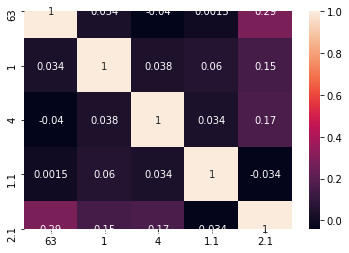

In [5]:
dfcor=df.corr()
print(dfcor)
sns.heatmap(dfcor,annot=True)

In [6]:
df.dtypes

63      int64
1       int64
4       int64
140    object
260    object
0      object
1.1     int64
112    object
1.2    object
3      object
2      object
?      object
?.1    object
2.1     int64
dtype: object

In [7]:
df=pd.get_dummies(df,drop_first=True)
df

,63,1,4,1.1,2.1,140_100,140_102,140_104,140_106,140_110,...,3_3.5,3_4,3_?,2_2,2_3,2_?,?_?,?.1_6,?.1_7,?.1_?
0,44,1,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,60,1,4,1,2,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,55,1,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,66,1,3,2,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,66,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
195,62,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
196,55,1,4,1,2,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
197,58,1,4,2,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [8]:

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,63,1,4,1.1,2.1,140_100,140_102,140_104,140_106,140_110,...,3_3.5,3_4,3_?,2_2,2_3,2_?,?_?,?.1_6,?.1_7,?.1_?
12,63,1,3,2,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
22,74,1,3,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
25,51,1,4,1,2,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
29,54,1,4,1,3,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
57,62,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
67,65,1,4,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
118,56,1,4,2,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
119,62,1,3,1,2,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [9]:
x=df.iloc[:,1:]
x

,1,4,1.1,2.1,140_100,140_102,140_104,140_106,140_110,140_112,...,3_3.5,3_4,3_?,2_2,2_3,2_?,?_?,?.1_6,?.1_7,?.1_?
0,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,4,1,2,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,1,4,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,3,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,4,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
195,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
196,1,4,1,2,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
197,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [10]:
y=df.iloc[:,0]
y

0      44
1      60
2      55
3      66
4      66
       ..
194    54
195    62
196    55
197    58
198    62
Name: 63, Length: 199, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.17631813,  0.62583065,  0.38983236, ..., -0.2046578 ,
        -0.35255324,  0.45393899],
       [ 0.17631813,  0.62583065,  0.38983236, ..., -0.2046578 ,
        -0.35255324,  0.45393899],
       [ 0.17631813,  0.62583065,  0.38983236, ..., -0.2046578 ,
        -0.35255324,  0.45393899],
       ...,
       [ 0.17631813,  0.62583065,  0.38983236, ...,  4.88620507,
        -0.35255324, -2.20293921],
       [ 0.17631813,  0.62583065,  1.85354255, ..., -0.2046578 ,
        -0.35255324,  0.45393899],
       [ 0.17631813, -1.89013499,  1.85354255, ..., -0.2046578 ,
        -0.35255324,  0.45393899]])

In [12]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print('max r2_score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [13]:
lreg=LinearRegression()
maxr2_score(lreg,x,y)

r2 score corresponding to  42 is -2.879357884669607e+28
r2 score corresponding to  43 is -1.2750288183467308e+28
r2 score corresponding to  44 is -3.243955157871867e+28
r2 score corresponding to  45 is -4.862832854210158e+28
r2 score corresponding to  46 is -4.3207638523603286e+24
r2 score corresponding to  47 is -6.892081554035982e+28
r2 score corresponding to  48 is -1.5165231027322254e+29
r2 score corresponding to  49 is -8.957386105485046e+28
r2 score corresponding to  50 is -1.4930440343157134e+28
r2 score corresponding to  51 is -5.558830676296458e+28
r2 score corresponding to  52 is -6.58882380428005e+28
r2 score corresponding to  53 is -7.4362742697034414e+28
r2 score corresponding to  54 is -8.70277549604411e+28
r2 score corresponding to  55 is -2.8314098047776534e+26
r2 score corresponding to  56 is -9.804788212561256e+28
r2 score corresponding to  57 is -2.8673728408216946e+28
r2 score corresponding to  58 is -2.7606751189259376e+28
r2 score corresponding to  59 is -6.957457

UnboundLocalError: local variable 'final_r_state' referenced before assignment

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [15]:
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.05129063557034763
r2 score corresponding to  43 is -0.060290803907067536
r2 score corresponding to  44 is -0.01485677666602836
r2 score corresponding to  45 is -0.10626569700606403
r2 score corresponding to  46 is -0.06909479258993234
r2 score corresponding to  47 is 0.21942864392016714
r2 score corresponding to  48 is 0.011009520347445623
r2 score corresponding to  49 is -0.08416642495276183
r2 score corresponding to  50 is -0.053429170856092334
r2 score corresponding to  51 is -0.056744417387274204
r2 score corresponding to  52 is -0.012286102989371495
r2 score corresponding to  53 is -0.0589508644035035
r2 score corresponding to  54 is 0.027268795275980806
r2 score corresponding to  55 is 0.14463979833376472
r2 score corresponding to  56 is 0.03078622285940602
r2 score corresponding to  57 is 0.0077023908819308096
r2 score corresponding to  58 is -0.12880313611198857
r2 score corresponding to  59 is 0.005926645578339218
r2 score corresponding to  6

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [17]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42 is -0.0018495705269658824
r2 score corresponding to  43 is -0.027026806952402005
r2 score corresponding to  44 is 0.0023112773898997796
r2 score corresponding to  45 is -0.12991581416202136
r2 score corresponding to  46 is -0.021021269177744273
r2 score corresponding to  47 is 0.044244430984067384
r2 score corresponding to  48 is -0.06551284971175919
r2 score corresponding to  49 is -0.2533813265339606
r2 score corresponding to  50 is -0.062138576492359876
r2 score corresponding to  51 is -0.010566021567694817
r2 score corresponding to  52 is -0.023064256159422758
r2 score corresponding to  53 is -0.09884804170534678
r2 score corresponding to  54 is 0.0053491437776467254
r2 score corresponding to  55 is 0.015575608599829871
r2 score corresponding to  56 is 0.00770473747456657
r2 score corresponding to  57 is 0.009165244334566114
r2 score corresponding to  58 is -0.12372471093633686
r2 score corresponding to  59 is 0.0005064456678905982
r2 score correspondi

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [21]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=500)
print('Mean r2 score is',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())

Mean r2 score is 0.03532875682092116


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lsreg=Lasso()
lreg.fit(x,y)
y_pred=lreg.predict(x_test)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.7958238105958118

In [25]:
mean_squared_error(y_test,y_pred)

0.6333355375112384

In [26]:
r2_score(y_test,y_pred)

0.9882876956504585

In [28]:
from sklearn.externals import joblib
joblib.dump(lsreg,'Heart_Disease_lsreg.pkl')

['Heart_Disease_lsreg.pkl']